In [1]:
"testing"

'testing'

In [ ]:
# TODO: See if we can get cellprofiler to run from the command line and spit out these files into this folder directly
# TRY USING THIS https://github.com/CellProfiler/notebooks/blob/master/cellprofiler_demo.ipynb
# TODO: Try also to implement a unet on this data e.g. https://github.com/KeremTurgutlu/deeplearning/blob/master/datasciencebowl2018/FASTAI%20-%20DSBOWL%202018.ipynb
# TODO: Try also to connect to your Mask-RCNN

### STEP 1: Load Data from CellProfiler

In [2]:
# This code will find the csv files output by CellProfiler and merge them into a single dataframe called df_combined_data.
import HCMVcellclassification as HCMVcc
df_combined_data, df_image_url, exp_name = HCMVcc.ImportData_NUC_CYTO()
#TODO: Stop this from moving other csvs we create downstream

EXPERIMENT NAME: 149_20191126_H3K4me3_v1

IMPORTED AND MERGED THE FOLLOWING FILES:
 - 149_20191126_H3K4me3_v1_NUC_DAPI.csv
 - 149_20191126_H3K4me3_v1_Cytoplasm.csv
 - 149_20191126_H3K4me3_v1_Image.csv

DETECTED NUCLEI: 105,507


### STEP 2: Data Organization and Check

In [3]:
# Display what the Image channels are named from cellprofiler, we want to make sure that C2 is the nucleus marker 
# TODO: Show the user the metadata column options #df_combined_data.columns.values also choose which chanels are which to use i.e. C1 C2 C3
var_C1 = df_image_url.columns.values[2] # will be displayed as red
var_C2 = df_image_url.columns.values[0] # will be displayed as green
var_C3 = df_image_url.columns.values[1] # will be dispalyed as blue
channel_li = [var_C1, var_C2, var_C3]
print(f'Channel 1 (Red) = {var_C1} \nChannel 2 (Green) = {var_C2} \nChannel 3 (Blue) = {var_C3}')
print(channel_li)

Channel 1 (Red) = URL_gB 
Channel 2 (Green) = URL_DAPI 
Channel 3 (Blue) = URL_H3K4me3
['URL_gB', 'URL_DAPI', 'URL_H3K4me3']


G:\149_other histone modifications\149_20191126_H3K4me3\_pipeline\v1\HCMVcellclassification.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


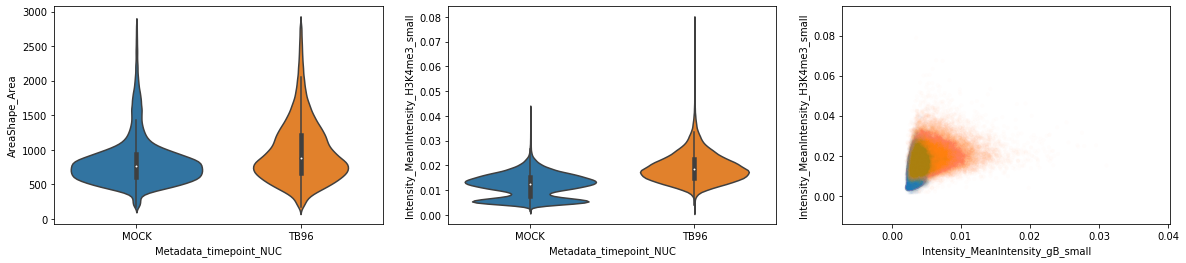

In [4]:
%matplotlib inline
group_data_by = 'Metadata_timepoint_NUC'
display_x_axis = 'Intensity_MeanIntensity_gB_small'
display_y_axis = 'Intensity_MeanIntensity_H3K4me3_small'
HCMVcc.DataCheck(df_combined_data, group_data_by, display_x_axis, display_y_axis)
#TODO: RENDER A FEW CELLS HERE ALSO, RANDOMLY SO WE GET AN IDEA OF DATA QUALITY BEFORE EXPORT

---

### STEP 3: Export images of each nucleus into a folder for use by the CNN

In [5]:
HCMVcc.GenerateIDs_IMGexport(df_combined_data,group_data_by,var_C1,var_C2,var_C3, exp_name, 400)
#TODO: show 10 random samples from each category in group_data_by with all channels and then just the ones used for the CNN 

EXAMPLE IDS: 149_20191126_repA_MOCK_1_2
CellProfiler scaled images by 4.6875


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 105507/105507 [01:11<00:00, 1480.63it/s]


### STEP 4: Train and Predict (or just predict) 

GO TO EITHER OF THE CNN_TRAIN AND PREDICT OR CNN_PREDICTIONS ONLY FROM GENERALIZABLE CNN

Once you are satisfied with the classification accuracy move on to the the next step
THIS WILL CREATE A LINK TO THIS Pridictions only [Predict from Generalizable CNN (click this link to go to notebook)](CNN_predictionsONLY.ipynb)

### STEP 7: Perform quantification of CNN predictions

In [6]:
#we are grouping our data via the "group_data_by" variable, so we can find the unique values in that
import os
import pandas as pd

predictions_folder_name = "CNNpredictions_20191202_0946"

exclude = ['blur','crap','overlap',
           '80confidence','70confidence','60confidence','50confidence']

predictions = []

for root, dirs, files in os.walk(predictions_folder_name, topdown=True):
    dirs[:] = [d for d in dirs if d not in exclude]
    if len(files) > 0:
        predictions.extend(list(zip([root.split(os.path.sep)[-1]]*len(files), files)))
        
df_predictions = pd.DataFrame(predictions, columns=['Group', 'Unique_ID'])

#strip "_RGB.jpg" from filename to match UNIQUE ID
df_predictions['Unique_ID'].replace(regex=True,inplace=True,to_replace='.jpg',value='')

#TODO: Now that we have used the CNN, can we plot the original graphs from above, but filtered by the CNN?! THAT WOULD BE VERY COOL. df_combined_data should have everything in it. 
#TODO: It would also be good to include some metrics about how much was CRAP and BLUR and OVERLAPING so that we can monitor how well this is working between replicates.

# TODO: replace TB_perfect with TB96 in the CNN foldername outputs
#df_predictions['Group'].replace('TB_perfect', 'TB96',inplace=True)
#print(df_combined_data[group_data_by].unique())
#print(df_predictions['Group'].unique())

print(df_predictions.shape[0])
df_predictions = df_predictions[((df_predictions['Group'] =='MOCK') & (df_predictions['Unique_ID'].str.contains('MOCK')))|
                               ((df_predictions['Group'] =='TB96') & (df_predictions['Unique_ID'].str.contains('TB96')))]
print(df_predictions.shape[0])

43973
32462


In [7]:
#TODO: use pickle to make linescan_len a global variable
linescan_len = 250 #NOTE THIS IS CURRENTLY HARDCODED IN THE .PY FILE
df_predictions_coords = HCMVcc.linescan_calculations(df_combined_data, df_predictions, linescan_len)

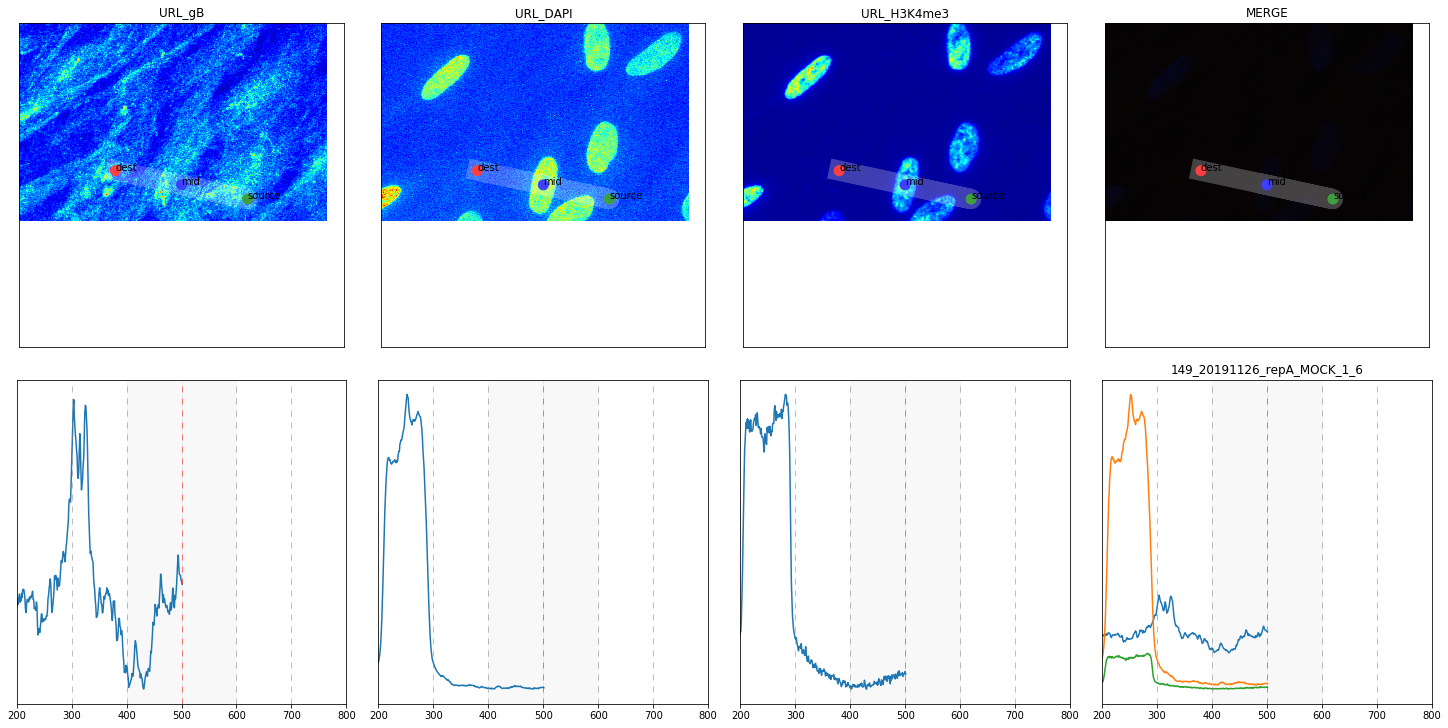

In [7]:
%matplotlib inline
HCMVcc.preview_linescans_MOCK(df_predictions_coords, 2, channel_li, 75)
#TODO: add fifth panel with overview of whole image and summary info under it (e,g, violin plot of range of values in the channel and where this example sites)
#TODO: add preview for TB96 here too

In [32]:
df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]
df_linescans_TB96_75lw = HCMVcc.getlinescans_TB96(df_predictions_coords_TB96, channel_li[0:3], exp_name,75)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6166/6166 [29:53<00:00,  3.44it/s]


In [31]:
df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]
df_linescans_MOCK_75lw = HCMVcc.getlinescans_MOCK(df_predictions_coords_MOCK, channel_li[0:3], exp_name,75)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 26296/26296 [2:05:41<00:00,  3.49it/s]


In [ ]:
# the above is with an 80 pixel linescan, but we should be doing 75. We were originally doing 150 but the scopes are different. I don't think this will changee much as it is averaging

In [33]:
#or just load df_linescans_MOCK from csv if you've already saved it down
#TODO: create loadlinescans_MOCK
import pandas as pd
#df_linescans_MOCK = pd.read_csv(f'_linescans/{exp_name}_linescans_MOCK.csv')
#df_linescans_TB96 = pd.read_csv(f'_linescans/{exp_name}_linescans_TB96.csv')

In [34]:
#TODO: pull these names from the URL dictionary above... see how you did it in 3 bio reps linescans
channel_dict = { 0:["C1","gB","red"],
                 1:["C2","Hoechst","blue"],
                 2:["C3","H3K4me3","green"] }

In [1]:
def merge_MOCK_TB(df_MOCK, df_TB):
    print(df_MOCK.shape[1]/3) #4)
    print(df_TB.shape[1]/3) #4)
    df_FINAL = pd.concat([df_MOCK, df_TB], axis=1)
    print(df_FINAL.shape[1]/3)
    return df_FINAL
df_FINAL_ls75 = merge_MOCK_TB(df_linescans_MOCK_75lw, df_linescans_TB96_75lw)

NameError: name 'df_linescans_MOCK_75lw' is not defined

In [36]:
import numpy as np
df = df_FINAL_ls75
df_T = df.T
df_T["biorep"] = df_T.index.str.split('_').str[2]
df_T["timepoint"] = df_T.index.str.split('_').str[3]
df_T["channel"] = df_T.index.str.split('_').str[7]

df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

df_T.set_index(["biorep", "timepoint","channel"], inplace=True)
df_T.groupby(["biorep","channel", "timepoint"]).mean()

0           1           2           3    \
biorep channel timepoint                                                   
repA   DAPI    MOCK       119.021096  119.026753  119.013667  119.004005   
       H3K4me3 MOCK       156.736381  156.737243  156.671737  156.588510   
       gB      MOCK       195.848572  195.802027  195.751554  195.764322   
repB   DAPI    MOCK       124.149927  124.148461  124.116317  124.088096   
               TB96       125.037452  125.012329  124.965457  124.900292   
       H3K4me3 MOCK       268.952219  269.032850  268.989130  268.867873   
               TB96       378.978614  378.743884  378.383536  378.239987   
       gB      MOCK       211.886590  211.837424  211.756741  211.759414   
               TB96       345.974039  345.753093  345.671879  345.659116   
repC   DAPI    MOCK       132.387884  132.378694  132.347240  132.307966   
               TB96       129.045536  129.063537  129.048578  129.025569   
       H3K4me3 MOCK       312.010866  311.692911  311.247354  310.769220   
               TB96       444.330268  444.614657  444.855376  444.585320   
       gB      MOCK       214.185321  214.182741  214.203911  214.189263   
               TB96       297.497306  297.433889  297.364281  297.171566   
repD   DAPI    TB96       122.415049  122.348269  122.290691  122.259300   
       H3K4me3 TB96       340.087021  340.029714  340.123209  339.948261   
       gB      TB96       329.919785  329.760092  329.765855  329.676965   

                                 4           5           6           7    \
biorep channel timepoint                                                   
repA   DAPI    MOCK       118.990765  118.984140  118.959071  118.944705   
       H3K4me3 MOCK       156.557219  156.435051  156.370234  156.248518   
       gB      MOCK       195.761230  195.772401  195.744205  195.697608   
repB   DAPI    MOCK       124.061415  124.017511  123.972710  123.946377   
               TB96       124.854792  124.888580  124.903123  124.877647   
       H3K4me3 MOCK       268.704623  268.401899  268.215519  268.001714   
               TB96       377.471758  377.847020  377.726845  376.966846   
       gB      MOCK       211.697945  211.680215  211.714850  211.674276   
               TB96       345.476149  345.533602  345.626426  345.676783   
repC   DAPI    MOCK       132.202406  132.170384  132.113443  132.081195   
               TB96       129.038452  129.037841  129.010040  128.983395   
       H3K4me3 MOCK       310.036520  309.795186  309.416210  309.227023   
               TB96       444.570472  444.733330  444.691536  444.508878   
       gB      MOCK       214.268017  214.273944  214.193077  214.118018   
               TB96       297.280897  297.345449  297.312194  297.195984   
repD   DAPI    TB96       122.238062  122.178524  122.153272  122.153567   
       H3K4me3 TB96       340.056008  339.816530  339.811589  339.777515   
       gB      TB96       329.314557  329.371432  329.304695  329.255656   

                                 8           9    ...         532         533  \
biorep channel timepoint                          ...                           
repA   DAPI    MOCK       118.925282  118.909450  ...         NaN         NaN   
       H3K4me3 MOCK       156.140317  156.014715  ...         NaN         NaN   
       gB      MOCK       195.630590  195.621317  ...         NaN         NaN   
repB   DAPI    MOCK       123.919516  123.901000  ...         NaN         NaN   
               TB96       124.798755  124.741103  ...  123.706910  123.700163   
       H3K4me3 MOCK       267.767893  267.565298  ...         NaN         NaN   
               TB96       375.948134  375.288869  ...  375.251824  375.362536   
       gB      MOCK       211.649839  211.651122  ...         NaN         NaN   
               TB96       345.660508  345.641903  ...  371.312553  371.302082   
repC   DAPI    MOCK       132.051173  131.972043  ...         NaN         NaN   
               TB96

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns
channel_dict = {
    "C1":"gB",
    "C2":"DAPI",
    "C3":"H3K4me3"}

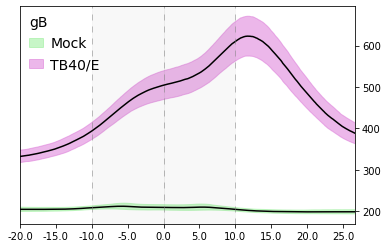

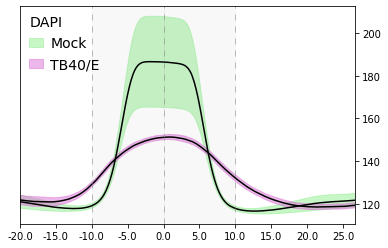

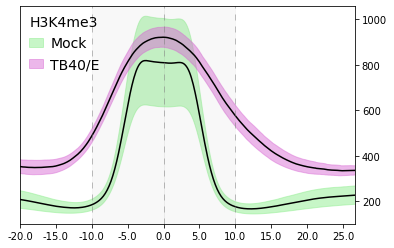

In [56]:
#### THIS IS UPDATE TO FIT WITH THE DATA FROM OUR ORIGINAL SCOPE ###
shift_val = 20
MOCK_x_values = np.linspace(shift_val, (shift_val+542), 542)

for channel_ID, channel_name in channel_dict.items():
    f = plt.figure()   
    ax = f.add_subplot(111)
    
    #plot MOCK
    ax.plot(df_bio_mean.loc[(channel_name,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_name,"MOCK")].index)
    ax.fill_between(N,df_upper.loc[(channel_name,"MOCK")],df_lower.loc[(channel_name,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")
    
    #plot TB
    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_name,"TB96")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_name,"TB96")].index)
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_name,"TB96")],df_lower.loc[(channel_name,"TB96")],label="TB40/E", alpha=0.5, color="orchid")
    
    midpoint = 250
    span = 75
    start = midpoint - span*3
    step = span/2
    stop = midpoint + span*3

    #ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
    ax.xaxis.set_ticks(np.arange(start,stop,step))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x-midpoint)/(75)*10,1))))
    
    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    ax.yaxis.tick_right()
    
    leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    leg._legend_box.align = "left"  

    ax.set_xlim(100,450)
    
    plt.savefig(f'{exp_name}_GRAPH_{channel_name}_WITHticks_FORMATTED_linescan75px.png', dpi=600)
    plt.show()


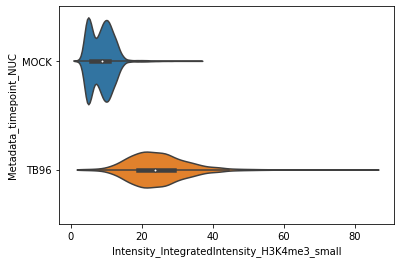

(105507, 112)
(32462, 112)
(73045, 112)


C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


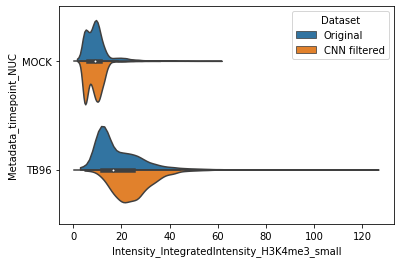

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
data = df_predictions_coords.reset_index()
y_group = "Intensity_IntegratedIntensity_H3K4me3_small"
sns.violinplot(y=group_data_by, x=y_group, data=data, size=10, cut=0) #,palette=["Original":])#,bw=1) #,inner="stick") #,scale="area") 
plt.show()

filtered_li = df_predictions["Unique_ID"]
df_combined_data_CNNfilterd = df_combined_data[df_combined_data["Unique_ID"].isin(filtered_li)]
df_combined_data_CNNremoved = df_combined_data[~df_combined_data["Unique_ID"].isin(filtered_li)]
print(df_combined_data.shape)
print(df_combined_data_CNNfilterd.shape)
print(df_combined_data_CNNremoved.shape)
df_combined_data["Dataset"] = "Original"
df_combined_data_CNNfilterd["Dataset"] = "CNN filtered"
df_combined_data_CNNremoved["Dataset"] = "removed"
df_combined_data_COMPOSITE = df_combined_data.copy()
df_combined_data_COMPOSITE = df_combined_data_COMPOSITE.append(df_combined_data_CNNfilterd)
sns.violinplot(y=group_data_by, x=y_group, data=df_combined_data_COMPOSITE.reset_index(), size=10 ,hue="Dataset", cut=-2,split=True,) #,palette=["Original":])#,bw=1) #,inner="stick") #,scale="area") 

In [10]:
df_combined_data_COMPOSITE.to_csv(f"{exp_name}_df_combined_data_COMPOSITE_cnnoriginalvsfiltered.csv")

In [11]:
#####20200213###### attempting to export all the single images, starting with TB96
from pathlib import Path


import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate

df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]

#os.makedirs("_cropped_rotated", exist_ok=True)
#os.makedirs("/_cropped_only/TB96", exist_ok=True)
Path("_cropped_only/TB96").mkdir(parents=True, exist_ok=True)
Path("_cropped_only/MOCK").mkdir(parents=True, exist_ok=True)

total_shape = df_predictions_coords_TB96.shape[0]
for index, rows in tqdm(df_predictions_coords_TB96.iterrows(), total=total_shape):
    try:
        x0 = int(df_predictions_coords_TB96['NUC_x0'][index])
        y0 = int(df_predictions_coords_TB96['NUC_y0'][index])
        #ori_radians_TB96 = df_predictions_coords_TB96["AC_to_NUC_orientation_radians"][index]
        #ori_degrees_TB96 = np.degrees(ori_radians_TB96)

        x1 = x0 - 200
        x2 = x0 + 200
        y1 = y0 - 200
        y2 = y0 + 200

        #TODO: turn this into a 3 channel stack
        #TODO: this could also be performed at the same time for as linescans, would save some time...

        img_C1 = skimage.io.imread(df_predictions_coords_TB96["URL_C1"][index], as_gray=True, plugin='tifffile')
        img_C1 = np.array(img_C1)
        cropped_C1 = img_C1[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/TB96/{df_predictions_coords_TB96["Unique_ID"][index]}_C1.tif', cropped_C1, plugin='tifffile')

        img_C2 = skimage.io.imread(df_predictions_coords_TB96["URL_C2"][index], as_gray=True, plugin='tifffile')
        img_C2 = np.array(img_C2)
        cropped_C2 = img_C2[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/TB96/{df_predictions_coords_TB96["Unique_ID"][index]}_C2.tif', cropped_C2, plugin='tifffile')

        img_C3 = skimage.io.imread(df_predictions_coords_TB96["URL_C3"][index], as_gray=True, plugin='tifffile')
        img_C3 = np.array(img_C3)
        cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/TB96/{df_predictions_coords_TB96["Unique_ID"][index]}_C3.tif', cropped_C3, plugin='tifffile')
    except:
        pass


  0%|                                                                                                                       | 0/6166 [00:00<?, ?it/s]C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:38: UserWarning: _cropped_only/TB96/149_20191126_repB_TB96_4606_4_C1.tif is a low contrast image
C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:43: UserWarning: _cropped_only/TB96/149_20191126_repB_TB96_4606_4_C2.tif is a low contrast image
C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:48: UserWarning: _cropped_only/TB96/149_20191126_repB_TB96_4606_4_C3.tif is a low contrast image
  0%|                                                                                                               | 1/6166 [00:00<34:06,  3.01it/s]C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:38: UserWarning: _cropped_only/TB96/149_20191126_repB_TB96_4607_1_C1.tif is a low contr

In [ ]:
df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]

#os.makedirs("_cropped_rotated", exist_ok=True)
#os.makedirs("/_cropped_only/TB96", exist_ok=True)
Path("_cropped_only/TB96").mkdir(parents=True, exist_ok=True)
Path("_cropped_only/MOCK").mkdir(parents=True, exist_ok=True)

total_shape = df_predictions_coords_MOCK.shape[0]
for index, rows in tqdm(df_predictions_coords_MOCK.iterrows(), total=total_shape):
    try:
        x0 = int(df_predictions_coords_MOCK['NUC_x0'][index])
        y0 = int(df_predictions_coords_MOCK['NUC_y0'][index])
        #ori_radians_TB96 = df_predictions_coords_MOCK["AC_to_NUC_orientation_radians"][index]
        #ori_degrees_TB96 = np.degrees(ori_radians_MOCK)

        x1 = x0 - 200
        x2 = x0 + 200
        y1 = y0 - 200
        y2 = y0 + 200

        #TODO: turn this into a 3 channel stack
        #TODO: this could also be performed at the same time for as linescans, would save some time...

        img_C1 = skimage.io.imread(df_predictions_coords_MOCK["URL_C1"][index], as_gray=True, plugin='tifffile')
        img_C1 = np.array(img_C1)
        cropped_C1 = img_C1[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/MOCK/{df_predictions_coords_MOCK["Unique_ID"][index]}_C1.tif', cropped_C1, plugin='tifffile')

        img_C2 = skimage.io.imread(df_predictions_coords_MOCK["URL_C2"][index], as_gray=True, plugin='tifffile')
        img_C2 = np.array(img_C2)
        cropped_C2 = img_C2[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/MOCK/{df_predictions_coords_MOCK["Unique_ID"][index]}_C2.tif', cropped_C2, plugin='tifffile')

        img_C3 = skimage.io.imread(df_predictions_coords_MOCK["URL_C3"][index], as_gray=True, plugin='tifffile')
        img_C3 = np.array(img_C3)
        cropped_C3 = img_C3[y1:y2,x1:x2] # y has to come before x
        skimage.io.imsave(f'_cropped_only/MOCK/{df_predictions_coords_MOCK["Unique_ID"][index]}_C3.tif', cropped_C3, plugin='tifffile')
    except:
        pass

  0%|                                                                                                                      | 0/26296 [00:00<?, ?it/s]C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:27: UserWarning: _cropped_only/MOCK/149_20191126_repA_MOCK_1_4_C1.tif is a low contrast image
C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:32: UserWarning: _cropped_only/MOCK/149_20191126_repA_MOCK_1_4_C2.tif is a low contrast image
C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:37: UserWarning: _cropped_only/MOCK/149_20191126_repA_MOCK_1_4_C3.tif is a low contrast image
  0%|                                                                                                            | 1/26296 [00:00<3:36:55,  2.02it/s]C:\Users\Dean Procter\.conda\envs\HCMVcc\lib\site-packages\ipykernel_launcher.py:27: UserWarning: _cropped_only/MOCK/149_20191126_repA_MOCK_1_5_C1.tif is a low contrast image
C:

In [ ]:
import cv2
#TODO: figure out how to save these... 
#tifffile.imsave(f'{exp_name}_MOCK_average_R.tif', average_r, dtype=np.uint16)
#tifffile.imsave(f'{exp_name}_MOCK_average_G.tif', average_g, dtype=np.uint16)
#tifffile.imsave(f'{exp_name}_MOCK_average_B.tif', average_b, dtype=np.uint16)

#average_r.astype('uint16')

skimage.io.imsave(f'{exp_name}_MOCK_average_R.tif', average_r, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_MOCK_average_G.tif', average_r, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_MOCK_average_G.tif', average_r, plugin='tifffile')
import matplotlib.pyplot as plt
from skimage import exposure
import matplotlib.patches as patches

p0, p100 = np.percentile(average_r, (0, 25))
average_r_adjusted  = exposure.rescale_intensity(average_r, in_range=(p0, p100))

p0, p100 = np.percentile(average_g, (40, 100))
average_g_adjusted  = exposure.rescale_intensity(average_g, in_range=(p0, p100))

p0, p100 = np.percentile(average_b, (20, 100))
average_b_adjusted  = exposure.rescale_intensity(average_b, in_range=(p0, p100))

red_8bit = (average_r_adjusted).astype('uint8')
green_8bit = (average_g_adjusted).astype('uint8')
blue_8bit = (average_b_adjusted).astype('uint8') 

average_rgb = cv2.merge((red_8bit,green_8bit,blue_8bit))

#average_rgb = np.dstack((average_r_adjusted, average_g_adjusted, average_b_adjusted))

#average_r_adjusted = exposure.rescale_intensity(average_r_adjusted,(0,100))

fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

circle_R = plt.Circle((300, 300), 298, color='k', fill=False)
circle_G = plt.Circle((300, 300), 298, color='k', fill=False)
circle_B = plt.Circle((300, 300), 298, color='k', fill=False)
circle_RGB = plt.Circle((300, 300), 298, color='k', fill=False)

patch_R = patches.Circle((300, 300), radius=300, transform=ax[0].transData)
patch_G = patches.Circle((300, 300), radius=300, transform=ax[1].transData)
patch_B = patches.Circle((300, 300), radius=300, transform=ax[2].transData)
patch_RGB = patches.Circle((300, 300), radius=300, transform=ax[3].transData)

#display individual channel images and merged image
R_clip = ax[0].imshow(average_r_adjusted,'jet')
G_clip = ax[1].imshow(average_g_adjusted,'jet')
B_clip = ax[2].imshow(average_b_adjusted,'jet')
RGB_clip = ax[3].imshow(average_rgb)

R_clip.set_clip_path(patch_R)
G_clip.set_clip_path(patch_G)
B_clip.set_clip_path(patch_B)
RGB_clip.set_clip_path(patch_RGB)

ax[0].add_artist(circle_R)
ax[0].axis('off')

ax[1].add_artist(circle_G)
ax[1].axis('off')

ax[2].add_artist(circle_B)
ax[2].axis('off')

ax[3].add_artist(circle_RGB)
ax[3].axis('off')
plt.show()

In [ ]:
import tifffile
from tqdm import tqdm as tqdm
import numpy as np
import skimage.io
from PIL import Image
from skimage.transform import rotate

N = df_predictions_coords_MOCK.shape[0]
average_r_TB=np.zeros((600,600),np.float)
average_g_TB=np.zeros((600,600),np.float)
average_b_TB=np.zeros((600,600),np.float)
#index_li = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,18,20]

#note, this will only work for mock 

df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]

total_shape = df_predictions_coords_TB96.shape[0]

#for index in index_li:
for index, rows in tqdm(df_predictions_coords_TB96.iterrows(), total=total_shape):
    x0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    y0 = int(df_predictions_coords_TB96["ACtoNUC_X_Midpoint"][index])
    ori_radians_TB96 = df_predictions_coords_TB96["AC_to_NUC_orientation_radians"][index]
    ori_degrees_TB96 = np.degrees(ori_radians_TB96)
    x1 = x0 - 300
    x2 = x0 + 300
    y1 = y0 - 300
    y2 = y0 + 300
    
    #TODO: turn this into a 3 channel stack
    #TODO: this could also be performed at the same time for as linescans, would save some time...
    
    img_r = skimage.io.imread(df_predictions_coords_TB96["URL_C1"][index], as_gray=True, plugin='tifffile')
    img_r = np.array(img_r)
    cropped_r = img_r[y1:y2,x1:x2] # y has to come before x
    
    img_g = skimage.io.imread(df_predictions_coords_TB96["URL_C2"][index], as_gray=True, plugin='tifffile')
    img_g = np.array(img_g)
    cropped_g = img_g[y1:y2,x1:x2] # y has to come before x
    
    img_b = skimage.io.imread(df_predictions_coords_TB96["URL_C3"][index], as_gray=True, plugin='tifffile')
    img_b = np.array(img_b)
    cropped_b = img_b[y1:y2,x1:x2] # y has to come before x
    
    #img_rgb = (np.dstack((img_r, img_g, img_b))/(32)).astype(np.uint8)

    if cropped_r.shape[0] == 600 and cropped_r.shape[1] == 600:
        
        cropped_rotated_r = rotate(cropped_r, ori_degrees_TB96)
        average_r_TB = average_r_TB + cropped_rotated_r/N
        
        cropped_rotated_g = rotate(cropped_g, ori_degrees_TB96)
        average_g_TB = average_g_TB + cropped_rotated_g/N
        
        cropped_rotated_b = rotate(cropped_b, ori_degrees_TB96)
        average_b_TB = average_b_TB + cropped_rotated_b/N

average_rgb_TB = (np.dstack((average_r_TB, average_g_TB, average_b_TB))/(32)).astype(np.uint8)

fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

#display individual channel images and merged image
ax[0].imshow(average_r_TB, cmap='jet')
ax[1].imshow(average_g_TB, cmap='jet')
ax[2].imshow(average_b_TB, cmap='jet')
ax[3].imshow(average_rgb_TB)

plt.show()

In [ ]:
import numpy as np
import cv2
#TODO: figure out how to save these... 
#tifffile.imsave(f'{exp_name}_MOCK_average_R.tif', average_r, dtype=np.uint16)
#tifffile.imsave(f'{exp_name}_MOCK_average_G.tif', average_g, dtype=np.uint16)
#tifffile.imsave(f'{exp_name}_MOCK_average_B.tif', average_b, dtype=np.uint16)

#average_r.astype('uint16')

skimage.io.imsave(f'{exp_name}_MOCK_average_R.tif', average_r_TB, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_MOCK_average_G.tif', average_g_TB, plugin='tifffile')
skimage.io.imsave(f'{exp_name}_MOCK_average_G.tif', average_b_TB, plugin='tifffile')

import matplotlib.pyplot as plt
from skimage import exposure
import matplotlib.patches as patches

p0, p100 = np.percentile(average_r_TB, (70, 100))
average_r_adjusted_TB  = exposure.rescale_intensity(average_r_TB, in_range=(p0, p100))

p0, p100 = np.percentile(average_g_TB, (50, 100))
average_g_adjusted_TB  = exposure.rescale_intensity(average_g_TB, in_range=(p0, p100))

p0, p100 = np.percentile(average_b_TB, (50, 100))
average_b_adjusted_TB  = exposure.rescale_intensity(average_b_TB, in_range=(p0, p100))

#average_r_adjusted_TB = exposure.adjust_gamma(average_r_TB, 10)
#average_g_adjusted_TB = exposure.adjust_gamma(average_g_TB, 20)
#average_b_adjusted_TB = exposure.adjust_gamma(average_b_TB, 5)

red_8bit_TB = (average_r_adjusted_TB*100).astype('uint8')
green_8bit_TB = (average_g_adjusted_TB*100).astype('uint8')
blue_8bit_TB = (average_b_adjusted_TB*100).astype('uint8') 

average_rgb_TB = cv2.merge((red_8bit_TB,green_8bit_TB,blue_8bit_TB))

#average_rgb = np.dstack((average_r_adjusted, average_g_adjusted, average_b_adjusted))

#average_r_adjusted = exposure.rescale_intensity(average_r_adjusted,(0,100))

fig, ax = plt.subplots(1,4, figsize=(20,10), constrained_layout=True)

circle_R = plt.Circle((300, 300), 298, color='k', fill=False)
circle_G = plt.Circle((300, 300), 298, color='k', fill=False)
circle_B = plt.Circle((300, 300), 298, color='k', fill=False)
circle_RGB = plt.Circle((300, 300), 298, color='k', fill=False)

patch_R = patches.Circle((300, 300), radius=300, transform=ax[0].transData)
patch_G = patches.Circle((300, 300), radius=300, transform=ax[1].transData)
patch_B = patches.Circle((300, 300), radius=300, transform=ax[2].transData)
patch_RGB = patches.Circle((300, 300), radius=300, transform=ax[3].transData)

#display individual channel images and merged image
R_clip = ax[0].imshow(average_r_adjusted_TB,'jet')
G_clip = ax[1].imshow(average_g_adjusted_TB,'jet')
B_clip = ax[2].imshow(average_b_adjusted_TB,'jet')
RGB_clip = ax[3].imshow(average_rgb_TB*2)

R_clip.set_clip_path(patch_R)
G_clip.set_clip_path(patch_G)
B_clip.set_clip_path(patch_B)
RGB_clip.set_clip_path(patch_RGB)

ax[0].add_artist(circle_R)
ax[0].axis('off')

ax[1].add_artist(circle_G)
ax[1].axis('off')

ax[2].add_artist(circle_B)
ax[2].axis('off')

ax[3].add_artist(circle_RGB)
ax[3].axis('off')
plt.show()

In [ ]:
#TODO: make this cyle through and save a file every 200 lines?
#TODO: if df_linescnas_MOCK exists, then skip linescan collection and load the linescan data from the folder
#exp_name = "149_20191022_H3K4me3_v1"
channel_li = ['URL_C1','URL_C2','URL_C3']
df_predictions_coords_MOCK = df_predictions_coords[df_predictions_coords["Group"]=="MOCK"]
df_linescans_MOCK = HCMVcc.getlinescans_MOCK(df_predictions_coords_MOCK, channel_li,exp_name)

In [ ]:
#or just load df_linescans_MOCK from csv if you've already saved it down
#TODO: create loadlinescans_MOCK
import pandas as pd
df_linescans_MOCK = pd.read_csv(f'_linescans/{exp_name}_linescans_MOCK.csv')
df_linescans_TB96 = pd.read_csv(f'_linescans/{exp_name}_linescans_TB96.csv')

In [ ]:
#TODO: pull these names from the URL dictionary above... see how you did it in 3 bio reps linescans
channel_dict = { 0:["C1","gB","red"],
                 1:["C2","Hoechst","blue"],
                 2:["C3","H3K4me3","green"] }

In [ ]:
def merge_MOCK_TB(df_MOCK, df_TB):
    print(df_MOCK.shape[1]/3) #4)
    print(df_TB.shape[1]/3) #4)
    
    df_FINAL = pd.concat([df_MOCK, df_TB], axis=1)


    print(df_FINAL.shape[1]/3)
    return df_FINAL
df_FINAL = merge_MOCK_TB(df_linescans_MOCK, df_linescans_TB96)

In [ ]:
import numpy as np
df = df_FINAL
df_T = df.T
df_T["biorep"] = df_T.index.str.split('_').str[2]
df_T["timepoint"] = df_T.index.str.split('_').str[3]
df_T["channel"] = df_T.index.str.split('_').str[7]

df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

df_T.set_index(["biorep", "timepoint","channel"], inplace=True)
df_T.groupby(["biorep","channel", "timepoint"]).mean()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns
channel_dict = {
    "C1":"gB",
    "C2":"Hoechst",
    "C3":"H3K4me3"}


In [ ]:
#### THIS IS UPDATE TO FIT WITH THE DATA FROM OUR ORIGINAL SCOPE ###
shift_val = 15
MOCK_x_values = np.linspace(shift_val, (shift_val+1076), 1076)

for channel_ID, channel_name in channel_dict.items():
    f = plt.figure()   
    ax = f.add_subplot(111)
    
    #plot MOCK
    ax.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")

    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"TB96")].index)
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5, color="orchid")
    
    
    midpoint = 500
    span = 65
        
    #increment = 1
    #ticks_at = 5
    #start_val = 0
    #shift_axis = 64
    #end_Val = start_val + shift_axis + 20
    
    start = 500 -65*3
    step = 65/2
    stop = 650 + step
    

    #ax.set_xlim( ((400/26)*increment)*start_val,((400/26)*increment)*(end_Val-1))
    ax.xaxis.set_ticks(np.arange(start,stop,step))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: '{}'.format(round((x-500)/(65)*10,1))))
    
    
    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    ax.yaxis.tick_right()
    
    leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    leg._legend_box.align = "left"  

    ax.set_xlim(380,650)
    
    plt.savefig(f'{exp_name}_GRAPH_{channel_name}_WITHticks_FORMATTED.png', dpi=600)
    plt.show()


In [ ]:
shift_val = 15
MOCK_x_values = np.linspace(shift_val, (shift_val+1076), 1076)

for channel_ID, channel_name in channel_dict.items():
    f = plt.figure()   
    ax = f.add_subplot(111)
    
    #plot MOCK
    ax.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")

    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"TB96")].index)
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5, color="orchid")
    
    
    midpoint = 500
    span = 50
    
    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    ax.yaxis.tick_right()
    
    leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    leg._legend_box.align = "left"  

    ax.set_xlim(350,650)
    
    plt.savefig(f'{exp_name}_GRAPH_{channel_name}_WITHticks.png', dpi=600)
    plt.show()


In [ ]:
shift_val = 15
MOCK_x_values = np.linspace(shift_val, (shift_val+1076), 1076)

#plot gB and Hoechst in the same graph:

import matplotlib as mpl

mpl.rcParams['hatch.linewidth'] = 4 
f = plt.figure()   
ax = f.add_subplot(111)

ax2 = ax.twinx()

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

ax2.spines["right"].set_position(("axes", 0.85))
make_patch_spines_invisible(ax2)
ax2.spines["right"].set_visible(True)

channel_ID = "C1"
#plot MOCK gb
ax2.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
ax2.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,facecolor="orange")

#plot TB gb
ax2.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
ax2.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5,facecolor="orange", hatch="//",edgecolor="white")

channel_ID = "C2"

#plot MOCK HOECHST
ax.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
ax.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,facecolor="royalblue")

#plot TB HOECHST
ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5, facecolor="royalblue",hatch="\\\\",edgecolor="white")


#ax.yaxis.tick_right()
ax.yaxis.tick_right()
ax.yaxis.label.set_color("blue")
ax.tick_params(axis='y', colors="blue")
ax2.yaxis.label.set_color("darkorange")
ax2.tick_params(axis='y', colors="darkorange")
ax2.spines["right"].set_color('darkorange')

midpoint = 500
span = 50

ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
ax.yaxis.tick_right()

#leg = plt.legend(loc=2,frameon=False, fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)

ax2.set_ylim(120,790)

legA = ax.legend(loc="upper left", bbox_to_anchor=(0, 0.7), title_fontsize=14, title="Hoechst", ncol=1,frameon=False,fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
legA._legend_box.align = "left"  
legB = ax2.legend(loc="upper left", ncol=1,frameon=False,  title="gB", title_fontsize=14,  fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
legB._legend_box.align = "left"  
ax.yaxis.tick_right()

ax.set_xlim(350,650)

plt.savefig(f'{exp_name}_GRAPH_gB_Hoechst_WITHticks.png', dpi=600, bbox_inches = "tight")
plt.show()

In [ ]:
#what happens wehn we filter out the non-polarized
df_TB_T = df_linescans_TB96.filter(like="_C3", axis=1).T

In [ ]:
### Now let's try this by filtering towards the well polarized ones

midpoint = 485
df_TB_T["next_to_AC"] = df_TB_T.iloc[:,midpoint:(midpoint + 200)].mean(axis=1)
df_TB_T["away_from_AC"] = df_TB_T.iloc[:,(midpoint-200):midpoint].mean(axis=1)
df_TB_T["degree_of_polarization"] = df_TB_T["next_to_AC"]/df_TB_T["away_from_AC"]

mean_polarization = df_TB_T["degree_of_polarization"].mean(axis=0)
var = 1.0
df_TB_T_polarized_to_AC = df_TB_T[df_TB_T["degree_of_polarization"]>(mean_polarization*1.005*var)]
df_TB_T_polarized_to_rear = df_TB_T[df_TB_T["degree_of_polarization"]<(mean_polarization*0.995*var)]


print(df_TB_T.shape)
print(df_TB_T_polarized_to_AC.shape)
print(df_TB_T_polarized_to_rear.shape)
df_TB_polarized_to_AC = df_TB_T_polarized_to_AC.T[:-3]
df_TB_polarized_to_rear = df_TB_T_polarized_to_rear.T[:-3]

In [ ]:
print(mean_polarization)

In [ ]:
polarized_li = []
for cols in df_TB_polarized_to_rear.columns:
    ID = cols[:-3]
    polarized_li.append(ID + "_C1")
    polarized_li.append(ID + "_C2")
    polarized_li.append(ID + "_C3")
#print(polarized_li)

In [ ]:
df_TB_profile_ALLreps = df_linescans_TB96

df_TB_profile_ALLreps_filterd = df_TB_profile_ALLreps.loc[:, df_TB_profile_ALLreps.columns.str.contains('|'.join(polarized_li))]
print(f'Filtering for {(df_TB_profile_ALLreps_filterd.shape[1]/df_TB_profile_ALLreps.shape[1])} of the population')

In [ ]:
df_FINAL = merge_MOCK_TB(df_linescans_MOCK, df_TB_profile_ALLreps_filterd)

In [ ]:
df = df_FINAL
df_T = df.T
df_T["biorep"] = df_T.index.str.split('_').str[2]
df_T["timepoint"] = df_T.index.str.split('_').str[3]
df_T["channel"] = df_T.index.str.split('_').str[7]

df_tec_mean = df_T.groupby(["biorep","channel", "timepoint"]).mean()
df_bio_mean = df_tec_mean.groupby(["channel", "timepoint"]).mean()
df_bio_sem = df_tec_mean.groupby(["channel", "timepoint"]).std()/np.sqrt(3)
df_upper = df_bio_mean + df_bio_sem
df_lower = df_bio_mean - df_bio_sem

df_T.set_index(["biorep", "timepoint","channel"], inplace=True)
df_T.groupby(["biorep","channel", "timepoint"]).mean()

In [ ]:
shift_val = 15
MOCK_x_values = np.linspace(shift_val, (shift_val+1076), 1076)

for channel_ID, channel_name in channel_dict.items():
    f = plt.figure()   
    ax = f.add_subplot(111)
    
    #plot MOCK
    ax.plot(df_bio_mean.loc[(channel_ID,"MOCK")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"MOCK")].index)
    ax.fill_between(N,df_upper.loc[(channel_ID,"MOCK")],df_lower.loc[(channel_ID,"MOCK")],label="Mock", alpha=0.5,color="lightgreen")

    ax.plot(MOCK_x_values,df_bio_mean.loc[(channel_ID,"TB96")],'k-',label='_nolegend_')
    N=list(df_bio_mean.loc[(channel_ID,"TB96")].index)
    ax.fill_between(MOCK_x_values,df_upper.loc[(channel_ID,"TB96")],df_lower.loc[(channel_ID,"TB96")],label="TB40/E", alpha=0.5, color="orchid")
    
    
    midpoint = 500
    span = 50
    
    ax.axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax.axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax.axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
    ax.yaxis.tick_right()
    
    leg = plt.legend(loc=2,frameon=False, fontsize=14, title=channel_name, title_fontsize=14, handlelength=1, handletextpad=0.5, borderaxespad=0.25)
    leg._legend_box.align = "left"  

    ax.set_xlim(350,650)
    
    plt.savefig(f'{exp_name}_GRAPH_FILTERED_{channel_name}_WITHticks.png', dpi=600)
    plt.show()


In [ ]:
### Now let's try this by filtering towards the well polarized ones
df_TB_T = df_TB_profile_ALLreps.filter(like="_C3", axis=1).T
#df_TB_T = concat_df_TB.T
df_TB_T["next_to_AC"] = df_TB_T.iloc[:,1050:1200].max(axis=1)
df_TB_T["away_from_AC"] = df_TB_T.iloc[:,800:950].max(axis=1)
df_TB_T["degree_of_polarization"] = df_TB_T["next_to_AC"]/df_TB_T["away_from_AC"]

mean_polarization = df_TB_T["degree_of_polarization"].mean(axis=0)
var = 1.25
df_TB_T_polarized = df_TB_T[df_TB_T["degree_of_polarization"]>(mean_polarization*var)]
df_TB_T_NOTpolarized = df_TB_T[df_TB_T["degree_of_polarization"]<(mean_polarization*var)]
print(df_TB_T.shape)
print(df_TB_T_polarized.shape)
print(df_TB_T_NOTpolarized.shape)
df_TB_polarized = df_TB_T_polarized.T[:-3]
df_TB_NOTpolarized = df_TB_T_NOTpolarized.T[:-3]

In [ ]:
polarized_li = []
for cols in df_TB_polarized.columns:
    ID = cols[:-3]
    polarized_li.append(ID + "_C1")
    polarized_li.append(ID + "_C2")
    polarized_li.append(ID + "_C3")
    polarized_li.append(ID + "_C4")
#print(polarized_li)

In [ ]:
df_linescan_TB_filterd = df_TB_profile_ALLreps.loc[:, df_TB_profile_ALLreps.columns.str.contains('|'.join(polarized_li))]
print(df_TB_profile_ALLreps.shape)
print(df_linescan_TB_filterd.shape)

In [ ]:
    plt.plot(df_linescans_TB96.filter(regex=rep).filter(regex="URL_C2").mean(axis=1))
    plt.plot(df_linescans_TB96.filter(regex=rep).filter(regex="URL_C3").mean(axis=1))
plt.show()

        ax[0,channel_key].set_title(channel_info[1], color=channel_info[2])
        #ax[0,channel_key].plot(df_linescans_channel_filtered) 
        channel_error_high = df_linescans_channel_filtered.mean(axis=1) + df_linescans_channel_filtered.std(axis=1)
        channel_error_low = df_linescans_channel_filtered.mean(axis=1) - df_linescans_channel_filtered.std(axis=1)
        N=list(df_linescans_channel_filtered.index)

In [ ]:
rep_list = ["repB","repC","repD"]
figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7), constrained_layout=True,sharey='row') #,sharex=True)

for rep in rep_list:
    for channel_key, channel_info in channel_dict.items():

        df_linescans_channel_filtered = df_linescans.filter(regex=channel_info[0])

        ax[0,channel_key].set_title(channel_info[1], color=channel_info[2])
        #ax[0,channel_key].plot(df_linescans_channel_filtered) 

        channel_error_high = df_linescans_channel_filtered.mean(axis=1) + df_linescans_channel_filtered.std(axis=1)
        channel_error_low = df_linescans_channel_filtered.mean(axis=1) - df_linescans_channel_filtered.std(axis=1)
        N=list(df_linescans_channel_filtered.index)

        ax[1,channel_key].plot(df_linescans_channel_filtered.mean(axis=1),channel_info[2])
        ax[1,channel_key].fill_between(N,channel_error_high,channel_error_low,color=channel_info[2],alpha=0.2)
        ax[1,channel_key].set_xlim(200,800)

        ax[1,3].plot(df_linescans_channel_filtered.mean(axis=1), channel_info[2])
        ax[1,3].fill_between(N,channel_error_high,channel_error_low, color=channel_info[2],alpha=0.2)

ax[0,3].set(title="MERGE")    
ax[1,3].set_xlim(200,800)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("seaborn-colorblind")

#TODO: Now we need to choose between a summary from a single biological replicate and three or more (n=x?)
# def plot_linescans_n_bioreps():

def plot_linescans_single_biorep(df_linescans, channel_dict):
    
    figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7), constrained_layout=True,sharey='row') #,sharex=True)
    
    #TODO: get ticks onto the right
    
    for channel_key, channel_info in channel_dict.items():
        
        df_linescans_channel_filtered = df_linescans.filter(regex=channel_info[0])
        
        ax[0,channel_key].set_title(channel_info[1], color=channel_info[2])
        #ax[0,channel_key].plot(df_linescans_channel_filtered) 
        
        channel_error_high = df_linescans_channel_filtered.mean(axis=1) + df_linescans_channel_filtered.std(axis=1)
        channel_error_low = df_linescans_channel_filtered.mean(axis=1) - df_linescans_channel_filtered.std(axis=1)
        N=list(df_linescans_channel_filtered.index)
        
        ax[1,channel_key].plot(df_linescans_channel_filtered.mean(axis=1),channel_info[2])
        ax[1,channel_key].fill_between(N,channel_error_high,channel_error_low,color=channel_info[2],alpha=0.2)
        ax[1,channel_key].set_xlim(200,800)
        
        ax[1,3].plot(df_linescans_channel_filtered.mean(axis=1), channel_info[2])
        ax[1,3].fill_between(N,channel_error_high,channel_error_low, color=channel_info[2],alpha=0.2)

    ax[0,3].set(title="MERGE")    
    ax[1,3].set_xlim(200,800)
    """
    circle_R_MOCK = plt.Circle((300, 300), 298, color='k', fill=False)
    circle_G_MOCK = plt.Circle((300, 300), 298, color='k', fill=False)
    circle_B_MOCK = plt.Circle((300, 300), 298, color='k', fill=False)
    circle_RGB_MOCK = plt.Circle((300, 300), 298, color='k', fill=False)

    patch_MOCK_R = patches.Circle((300, 300), radius=300, transform=ax[0,0].transData)
    patch_MOCK_G = patches.Circle((300, 300), radius=300, transform=ax[0,1].transData)
    patch_MOCK_B = patches.Circle((300, 300), radius=300, transform=ax[0,2].transData)
    patch_MOCK_RGB = patches.Circle((300, 300), radius=300, transform=ax[0,3].transData)
    
    R_clip_MOCK = ax[0,0].imshow(average_r_adjusted,'Reds')
    G_clip_MOCK = ax[0,1].imshow(average_g_adjusted,'Blues')
    B_clip_MOCK = ax[0,2].imshow(average_b_adjusted,'Greens')
    RGB_clip_MOCK = ax[0,3].imshow(average_rgb)

    R_clip_MOCK.set_clip_path(patch_MOCK_R)
    G_clip_MOCK.set_clip_path(patch_MOCK_G)
    B_clip_MOCK.set_clip_path(patch_MOCK_B)
    RGB_clip_MOCK.set_clip_path(patch_MOCK_RGB)
    
    ax[0,0].add_artist(circle_R_MOCK)
    ax[0,0].axis('off')

    ax[0,1].add_artist(circle_G_MOCK)
    ax[0,1].axis('off')

    ax[0,2].add_artist(circle_B_MOCK)
    ax[0,2].axis('off')

    ax[0,3].add_artist(circle_RGB_MOCK)
    ax[0,3].axis('off')
    
    midpoint = 500
    span = 100
    img_size = 600
    
    for i in [0,1,2,3]:

        #draw verticle lines on the graph
        
        ax[1,i].axvline(x=midpoint, dashes=[5,5], linewidth=1,color='grey',alpha=0.5)
        ax[1,i].axvline(x=midpoint-span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        ax[1,i].axvline(x=midpoint+span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        ax[1,i].axvline(x=midpoint-2*span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        ax[1,i].axvline(x=midpoint+2*span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        #ax[1,i].axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
        #ax[1,i].axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')
        
        ax[0,i].axvline(x=300, dashes=[5,5], linewidth=1,color='grey',alpha=0.5)
        #ax[0,i].axvline(x=300-span, dashes=[5,5],ymin=0.075, ymax=0.925, linewidth=1,color='k',alpha=0.1)
        #ax[0,i].axvline(x=300+span, dashes=[5,5],ymin=0.075, ymax=0.925, linewidth=1,color='k',alpha=0.1)
        #ax[0,i].axvline(x=300-2*span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        #ax[0,i].axvline(x=300+2*span, dashes=[5,5], linewidth=1,color='k',alpha=0.1)
        
        ax[0,i].axhline(y=300, dashes=[5,5],xmin=0, xmax=1, linewidth=1,color='k',alpha=0.5)
        ax[0,i].axhline(y=150, dashes=[5,5],xmin=0.075, xmax=0.925, linewidth=1,color='grey',alpha=0.5)
        ax[0,i].axhline(y=450, dashes=[5,5],xmin=0.075, xmax=0.925, linewidth=1,color='grey',alpha=0.5)
        
        #set x limis for the linescan graphs
        ax[1,i].set_xlim(midpoint - img_size/2, midpoint + img_size/2)
        
        #remove ticks and labels from some figures
 
        ax[1,i].set_xticklabels(["","-200","-100","0","+100","+200",""])
        ax[0,i].set_xticks([])
        ax[1,i].yaxis.set_label_position("right")
        ax[1,i].yaxis.tick_right()
    """
    #plt.ylabels.right()
    plt.show()      
        
plot_linescans_single_biorep(df_linescans_MOCK, channel_dict)

In [ ]:
df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]
df_linescans_TB96 = HCMVcc.getlinescans_TB96(df_predictions_coords_TB96, channel_li[0:3], exp_name)
df_linescans_TB96 = pd.read_csv(f'_linescans/{exp_name}_linescans_TB96.csv')

In [ ]:
plt.plot(df_linescans_TB96.filter(regex="gB").mean(axis=1))
plt.plot(df_linescans_TB96.filter(regex="DAPI").mean(axis=1))
plt.plot(df_linescans_TB96.filter(regex="H3K4me3").mean(axis=1))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#TODO: Now we need to choose between a summary from a single biological replicate and three or more (n=x?)
# def plot_linescans_n_bioreps():
#def plot_linescans_single_biorep():

df_linescans_TB96_C1 = df_linescans_TB96.filter(regex="C1")
df_linescans_TB96_C2 = df_linescans_TB96.filter(regex="C2")
df_linescans_TB96_C3 = df_linescans_TB96.filter(regex="C3")

#TODO: pull these names from the URL dictionary above... see how you did it in 3 bio reps linescans
titles = ['gB', 'DAPI', 'H3K4me3']

figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7), sharex=True, sharey=True)

ax[0,0].set(title=titles[0])
ax[1,0].plot(df_linescans_TB96_C1.mean(axis=1),'k-')
ax[1,3].plot(df_linescans_TB96_C1.mean(axis=1))
#TB96_C1_error_high = df_linescans_TB96_C1.mean(axis=1) + df_linescans_TB96_C1.std(axis=1)
#TB96_C1_error_low = df_linescans_TB96_C1.mean(axis=1) - df_linescans_TB96_C1.std(axis=1)
#N = list(df_linescans_TB96_C1.index)
#ax[1,0].fill_between(N,TB96_C1_error_high,TB96_C1_error_low)

ax[0,1].set(title=titles[1])
ax[1,1].plot(df_linescans_TB96_C2.mean(axis=1),'k-')
ax[1,3].plot(df_linescans_TB96_C2.mean(axis=1))
#TB96_C2_error_high = df_linescans_TB96_C2.mean(axis=1) + df_linescans_TB96_C2.std(axis=1)
#TB96_C2_error_low = df_linescans_TB96_C2.mean(axis=1) - df_linescans_TB96_C2.std(axis=1)
#N = list(df_linescans_TB96_C2.index)
#ax[1,1].fill_between(N,TB96_C2_error_high,TB96_C2_error_low)


ax[0,2].set(title=titles[2])
ax[1,2].plot(df_linescans_TB96_C3.mean(axis=1),'k-')
ax[1,3].plot(df_linescans_TB96_C3.mean(axis=1))
#TB96_C3_error_high = df_linescans_TB96_C3.mean(axis=1) + df_linescans_TB96_C3.std(axis=1)
#TB96_C3_error_low = df_linescans_TB96_C3.mean(axis=1) - df_linescans_TB96_C3.std(axis=1)
#N = list(df_linescans_TB96_C3.index)
#ax[1,2].fill_between(N,TB96_C3_error_high,TB96_C3_error_low)


ax[1,2].set_xlim(200,800)
plt.show()

In [ ]:
#from tqdm import tqdm
#import pandas as pd

#channel_li = ["URL_C1", "URL_C2","URL_C3"]

# TODO:
#def get_linescans_ACtoNUC(df, channel_li):

#df_linescans_TB96 = pd.DataFrame()

#for index, row in tqdm(df_predictions_coords_TB96.iterrows(), total=df_predictions_coords_TB96.shape[0]):
#    src = (df_predictions_coords_TB96["X_AC_fixedradius"][index],df_predictions_coords_TB96["Y_AC_fixedradius"][index])
#    dst = (df_predictions_coords_TB96["X_NUC_fixedradius"][index],df_predictions_coords_TB96["Y_NUC_fixedradius"][index])
#    for c in channel_li:
#        ID_Channel = df_predictions_coords_TB96["Unique_ID"][index] + "_" + c
#        image = skimage.io.imread(df_predictions_coords_TB96[c][index], as_gray=True)
#        linescan = pd.Series(skimage.measure.profile_line(image, src, dst, linewidth=50, order=0, mode='constant', cval=0.0, reduce_func=np.mean))
#        df_linescans_TB96[ID_Channel] = linescan

In [ ]:
"""
#TODO: now figure out how to do linescans with
import skimage
import matplotlib.pyplot as plt

img_val = 10

df_predictions_coords_TB96 = df_predictions_coords[df_predictions_coords["Group"]=="TB96"]

image_C1 = skimage.io.imread(df_predictions_coords_TB96["URL_C1"].iloc[img_val], as_gray=True)
image_C2 = skimage.io.imread(df_predictions_coords_TB96["URL_C2"].iloc[img_val], as_gray=True)
image_C3 = skimage.io.imread(df_predictions_coords_TB96["URL_C3"].iloc[img_val], as_gray=True)

src = (df_predictions_coords_TB96["X_AC_fixedradius"].iloc[img_val],df_predictions_coords_TB96["Y_AC_fixedradius"].iloc[img_val])
dst = (df_predictions_coords_TB96["X_NUC_fixedradius"].iloc[img_val],df_predictions_coords_TB96["Y_NUC_fixedradius"].iloc[img_val])

linescan_C1 = skimage.measure.profile_line(image_C1, src, dst, linewidth=150, order=0, mode='constant', cval=0.0, reduce_func=np.mean)
linescan_C2 = skimage.measure.profile_line(image_C2, src, dst, linewidth=150, order=0, mode='constant', cval=0.0, reduce_func=np.mean)
linescan_C3 = skimage.measure.profile_line(image_C3, src, dst, linewidth=150, order=0, mode='constant', cval=0.0, reduce_func=np.mean)

fig, ax = plt.subplots(2,4, figsize=(20,10))

ax[0,0].imshow(image_C1,cmap='viridis')
ax[0,0].plot([src[0],dst[0]],[src[1],dst[1]], marker = 'o')
ax[1,0].plot(linescan_C1)

ax[0,1].imshow(image_C2,cmap='viridis')
ax[0,1].plot([src[0],dst[0]],[src[1],dst[1]], marker = 'o')
ax[1,1].plot(linescan_C2)

ax[0,2].imshow(image_C3,cmap='viridis')
ax[0,2].plot([src[0],dst[0]],[src[1],dst[1]], marker = 'o')
ax[1,2].plot(linescan_C3)

midpoint = 500
span = 100
for i in [0,1,2,3]:
    ax[1,i].axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax[1,i].axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')

ax[1,3].plot(linescan_C1)
ax[1,3].plot(linescan_C2)
ax[1,3].plot(linescan_C3)
#plt.tight_layout()
plt.show()

df_linescans_TB96.replace(0, np.nan, inplace=True)
df_linescans_TB96.shape
#os.makedirs("_linescans", exist_ok=True)
#df_linescans_TB96.to_csv(f'_linescans/{exp_name}_linescans_TB96.csv',index=False)
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#TODO: Now we need to choose between a summary from a single biological replicate and three or more (n=x?)

# def plot_linescans_n_bioreps():


#def plot_linescans_single_biorep():

df_linescan_MOCK_500_C1 = df_linescans_MOCK.filter(regex="C1")
df_linescan_MOCK_500_C2 = df_linescans_MOCK.filter(regex="C2")
df_linescan_MOCK_500_C3 = df_linescans_MOCK.filter(regex="C3")

#TODO: pull these names from the URL dictionary above... see how you did it in 3 bio reps linescans
titles = ['gB', 'DAPI', 'H3K4me3']

figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7), sharex=True, sharey=True)

ax[0,0].set(title=titles[0])
#ax[0,0].plot(df_linescan_MOCK_500_C1) 
ax[1,0].plot(df_linescan_MOCK_500_C1.mean(axis=1),'k-')

MOCK_C1_error_high = df_linescan_MOCK_500_C1.mean(axis=1) + df_linescan_MOCK_500_C1.std(axis=1)
MOCK_C1_error_low = df_linescan_MOCK_500_C1.mean(axis=1) - df_linescan_MOCK_500_C1.std(axis=1)
N=list(df_linescan_MOCK_500_C1.index)
ax[1,0].fill_between(N,MOCK_C1_error_high,MOCK_C1_error_low)

ax[0,1].set(title=titles[1])
#ax[0,1].plot(df_linescan_MOCK_500_C2) 
ax[1,1].plot(df_linescan_MOCK_500_C2.mean(axis=1),'k-')
MOCK_C2_error_high = df_linescan_MOCK_500_C2.mean(axis=1) + df_linescan_MOCK_500_C2.std(axis=1)
MOCK_C2_error_low = df_linescan_MOCK_500_C2.mean(axis=1) - df_linescan_MOCK_500_C2.std(axis=1)
N=list(df_linescan_MOCK_500_C2.index)
ax[1,1].fill_between(N,MOCK_C2_error_high,MOCK_C2_error_low)


ax[0,2].set(title=titles[2])
#ax[0,2].plot(df_linescan_MOCK_500_C3) 
ax[1,2].plot(df_linescan_MOCK_500_C3.mean(axis=1),'k-')
MOCK_C3_error_high = df_linescan_MOCK_500_C3.mean(axis=1) + df_linescan_MOCK_500_C3.std(axis=1)
MOCK_C3_error_low = df_linescan_MOCK_500_C3.mean(axis=1) - df_linescan_MOCK_500_C3.std(axis=1)
N=list(df_linescan_MOCK_500_C3.index)
ax[1,2].fill_between(N,MOCK_C3_error_high,MOCK_C3_error_low)
ax[1,2].set_xlim(200,800)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline


df_linescan_MOCK_500_C1 = df_linescans_TB96.filter(regex="C1")
df_linescan_MOCK_500_C2 = df_linescans_TB96.filter(regex="C2")
df_linescan_MOCK_500_C3 = df_linescans_TB96.filter(regex="C3")


titles = ['gB', 'DAPI', 'H3K4me3']

figure, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,7), sharex=True) #, sharey=True)

ax[0,0].set(title=titles[0])
#ax[0,0].plot(df_linescan_MOCK_500_C1) 
ax[1,0].plot(df_linescan_MOCK_500_C1.mean(axis=1),'k-')

#MOCK_C1_error_high = df_linescan_MOCK_500_C1.mean(axis=1) + df_linescan_MOCK_500_C1.std(axis=1)
#MOCK_C1_error_low = df_linescan_MOCK_500_C1.mean(axis=1) - df_linescan_MOCK_500_C1.std(axis=1)
#N=list(df_linescan_MOCK_500_C1.index)
#ax[1,0].fill_between(N,MOCK_C1_error_high,MOCK_C1_error_low)

ax[0,1].set(title=titles[1])
#ax[0,1].plot(df_linescan_MOCK_500_C2) 
ax[1,1].plot(df_linescan_MOCK_500_C2.mean(axis=1),'k-')
#MOCK_C2_error_high = df_linescan_MOCK_500_C2.mean(axis=1) + df_linescan_MOCK_500_C2.std(axis=1)
#MOCK_C2_error_low = df_linescan_MOCK_500_C2.mean(axis=1) - df_linescan_MOCK_500_C2.std(axis=1)
#N=list(df_linescan_MOCK_500_C2.index)
#ax[1,1].fill_between(N,MOCK_C2_error_high,MOCK_C2_error_low)


ax[0,2].set(title=titles[2])
#ax[0,2].plot(df_linescan_MOCK_500_C3) 
ax[1,2].plot(df_linescan_MOCK_500_C3.mean(axis=1),'k-')
#MOCK_C3_error_high = df_linescan_MOCK_500_C3.mean(axis=1) + df_linescan_MOCK_500_C3.std(axis=1)
#MOCK_C3_error_low = df_linescan_MOCK_500_C3.mean(axis=1) - df_linescan_MOCK_500_C3.std(axis=1)
#N=list(df_linescan_MOCK_500_C3.index)
#ax[1,2].fill_between(N,MOCK_C3_error_high,MOCK_C3_error_low)
#ax[1,2].set_xlim(200,800)

ax[1,3].plot(df_linescan_MOCK_500_C1.mean(axis=1))
ax[1,3].plot(df_linescan_MOCK_500_C2.mean(axis=1))
ax[1,3].plot(df_linescan_MOCK_500_C3.mean(axis=1))
#plt.tight_layout()

midpoint = 954
span = (400/26)*10
for i in [0,1,2,3]:
    ax[1,i].axvline(x=midpoint, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvline(x=midpoint-span, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvline(x=midpoint+span-1, dashes=[6,6], linewidth=1,color='grey',alpha=0.5)
    ax[1,i].axvspan((midpoint-span), midpoint, alpha=0.05, color='grey')
    ax[1,i].axvspan(midpoint,(midpoint+span), alpha=0.05, color='grey')

#TODO: ADD A TEXT BOX WITH INFO LIKE NUMBER OF REPLICATES place a text box in upper left in axes coords

plt.xlim(500,1500)

plt.show()


In [ ]:
df_linescans.shape